$$ F(t) = F_1(t) \left( 1 + \frac{2R_E^2 - R_2^2}{R_1^2} \frac{I_1(t)}{\left<I_1\right>} \right) + F_2$$




In [53]:
import astropy.units as u
from astropy.constants import G, c
import numpy as np

F_1 = 1  # Flux from K dwarf
F_2 = 0  # Flux from NS
M_2 = 1.4 * u.M_sun
M_1 = 0.6 * u.M_sun

R_1 = 0.8 * u.R_sun
R_2 = 10 * u.km

# D = 1.89 * R_1
a = (((31740 * u.s)**2 * (G * (M_1 + M_2))/(4 * np.pi**2))**(1/3)).to(u.R_sun)
distance = 6.7 * u.kpc

# Agol (2003)
R_E = np.sqrt( 4 * G * M_2 / c**2 * a).to(u.R_sun)

R_E

<Quantity 0.00568556 solRad>

In [56]:
magnification = (2 * R_E**2 - R_2**2) / R_1**2

In [63]:
magnification

<Quantity 0.00010102>

In [61]:
rprs = 10*u.km / R_1
depth = rprs.decompose()**2
depth

<Quantity 3.22831586e-10>

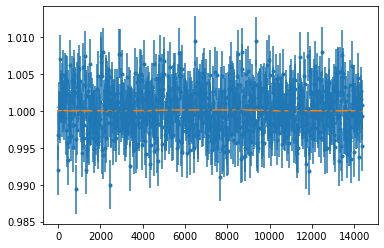

In [105]:
%matplotlib inline
import matplotlib.pyplot as plt

# 21 s -> SNR = 55
# https://jwst.etc.stsci.edu/

times = np.arange(0, 4*60*60, 21) * u.s
# snr = 60 typical for H=19 mag sources
snr = 300
fluxes = np.ones(len(times)) + snr**2
fluxes += np.random.randn(len(times)) * snr
errors = snr * np.ones(len(times))

from batman import TransitParams, TransitModel

p = TransitParams()
p.per = 31740
p.rp = 0.1
p.t0 = times.ptp().value / 2
p.inc = 90
p.w = 90
p.ecc = 0
p.limb_dark = 'quadratic'
p.u = [0.4, 0.2]
p.a = 2.7 - 0.8

model = TransitModel(p, times.value).light_curve(p)

model -= model.max()
model *= magnification.value/model.min()
model += 1

plt.errorbar(times.value, fluxes * model / fluxes.mean(), errors / fluxes.mean(), fmt='.')
plt.plot(times.value, model)

In [107]:
np.sqrt(10000) * snr

30000.0